In [1]:
# Importing the Keras libraries and packages
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.core import Dense, Dropout, Activation, Flatten
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import tensorflow
from sklearn.metrics import classification_report, confusion_matrix
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from numpy.random import seed
import os
import random


In [2]:
# seed = 2
# def reset_random_seeds():
#     os.environ['PYTHONHASHSEED'] = str(seed)
#     tensorflow.random.set_seed(seed)
#     np.random.seed(seed)
#     random.seed(seed)

In [11]:
# Part 1 - Develop a Baseline CNN Model

# A baseline model will show us a minimal model performance 
# to which other models will be compared


img_rows = 128
img_cols = 128
epochs = 35
batch_size = 64
num_of_train_samples = 5606
num_of_test_samples = 2397

In [4]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
    pyplot.figure(figsize=(10,5))
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Entropy Loss')
    pyplot.plot(history.history['loss'], color='green', label='train')
    pyplot.plot(history.history['val_loss'], color='blue', label='test')
    pyplot.legend()
    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('\nClassification Accuracy')
    pyplot.plot(history.history['accuracy'], color='green', label='train')
    pyplot.plot(history.history['val_accuracy'], color='blue', label='test')
    pyplot.legend()
    # save plot to file
#     filename = sys.argv[0].split('/')[-1]
#     pyplot.savefig(filename + '_plot.png')
#     pyplot.close()
    pyplot.show()

In [104]:
# Function that calculates Confusion Matrix and shows Classification Report
def class_report(test_set, model):
    Y_pred = model.predict(test_set, num_of_test_samples // batch_size+1)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_set.classes, y_pred))
    print('Classification Report')
    target_names = list(training_set.class_indices.keys())
    print(classification_report(test_set.classes, y_pred, target_names=target_names))

In [88]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.3)

training_set = datagen.flow_from_directory('artists', 
                                                 subset="training",
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('artists', 
                                            subset="validation",
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, shuffle=False,
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [17]:
print(test_set.class_indices)

{'Matisse': 0, 'Monet': 1, 'Pissaro': 2, 'Renoir': 3, 'Sargent': 4, 'VanGogh': 5}


In [18]:
# VGG Blocks
# The basic building block of classic CNNs is a sequence of the following: 
#     (i) a convolutional layer with padding to maintain the resolution, 
#     (ii) a nonlinearity such as a ReLU, 
#     (iii) a pooling layer such as a max pooling layer. 
# One VGG block consists of a sequence of convolutional layers, 
# followed by a max pooling layer for spatial downsampling. 
# In the original VGG paper [Simonyan & Zisserman, 2014], the authors employed convolutions with  3×3  kernels 
# with padding of 1 (keeping height and width) 
# and  2×2  max pooling with stride of 2 (halving the resolution after each block). 

In [19]:
# Define CNN model with one VGG-style block
# The 1-block VGG model has a single convolutional layer with 32 filters 
# followed by a max pooling layer
def baseline_model_1():
    #reset_random_seeds()
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
# The model will be fit for 35 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_1()
# Fit model
history = model.fit_generator(training_set, 
                              steps_per_epoch=len(training_set), # = num_of_train_samples // batch_size +1
                              validation_data=test_set, 
                              validation_steps=len(test_set), # = num_of_test_samples // batch_size +1
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 42s 792ms/step - loss: 2.6405 - accuracy: 0.1943 - val_loss: 1.6988 - val_accuracy: 0.2326
Epoch 2/35
53/53 [==============================] - 18s 334ms/step - loss: 1.6659 - accuracy: 0.2947 - val_loss: 1.6685 - val_accuracy: 0.3083
Epoch 3/35
53/53 [==============================] - 18s 335ms/step - loss: 1.6025 - accuracy: 0.3256 - val_loss: 1.7247 - val_accuracy: 0.2139
Epoch 4/35
53/53 [==============================] - 18s 334ms/step - loss: 1.6451 - accuracy: 0.2970 - val_loss: 1.6109 - val_accuracy: 0.3354
Epoch 5/35
53/53 [==============================] - 18s 335ms/step - loss: 1.5763 - accuracy: 0.3341 - val_loss: 1.6241 - val_accuracy: 0.3181
Epoch 6/35
53/53 [==============================] - 18s 334ms/step - loss: 1.5179 - accuracy: 0.3510 - val_loss: 1.5840 - val_accuracy: 0.3319
Epoch 7/35
53/53 [==============================] - 18s 335ms/step - loss: 1.5006 - accuracy: 0.3649 - val_loss: 1.5594 - val_accuracy: 0.3500

In [21]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 39.9306


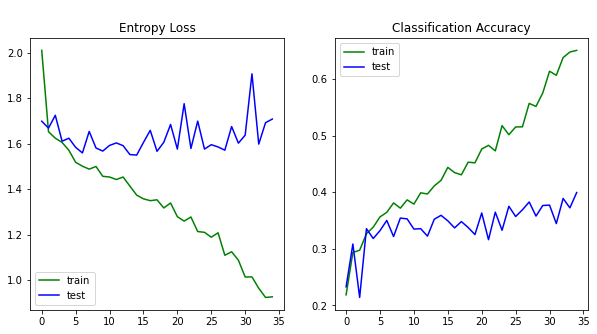

In [22]:
# Build graphs
summarize_diagnostics(history)

In [23]:
class_report(test_set, model)

Confusion Matrix
[[ 80  50  20  43  13  34]
 [ 17 112  39   9   5  58]
 [ 11  30  63  17   3 116]
 [ 28  13  16 114  17  52]
 [ 26  29  20  54  63  48]
 [  8  24  34  25   6 143]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.47      0.33      0.39       240
       Monet       0.43      0.47      0.45       240
     Pissaro       0.33      0.26      0.29       240
      Renoir       0.44      0.47      0.45       240
     Sargent       0.59      0.26      0.36       240
     VanGogh       0.32      0.60      0.41       240

    accuracy                           0.40      1440
   macro avg       0.43      0.40      0.39      1440
weighted avg       0.43      0.40      0.39      1440



In [31]:
# Define CNN model with two VGG-style blocks
def baseline_model_2():
   # reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [32]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# define model
model = baseline_model_2()
# fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs, 
                              verbose = 0)

In [33]:
# evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 50.1389


In [34]:
class_report(test_set, model)

Confusion Matrix
[[160  24   5  22  19  10]
 [ 16 146  25  12   9  32]
 [ 14  72  87  26  10  31]
 [ 35  23  10 128  23  21]
 [ 59  18  12  45  93  13]
 [ 19  39  26  25  23 108]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.53      0.67      0.59       240
       Monet       0.45      0.61      0.52       240
     Pissaro       0.53      0.36      0.43       240
      Renoir       0.50      0.53      0.51       240
     Sargent       0.53      0.39      0.45       240
     VanGogh       0.50      0.45      0.47       240

    accuracy                           0.50      1440
   macro avg       0.51      0.50      0.50      1440
weighted avg       0.51      0.50      0.50      1440



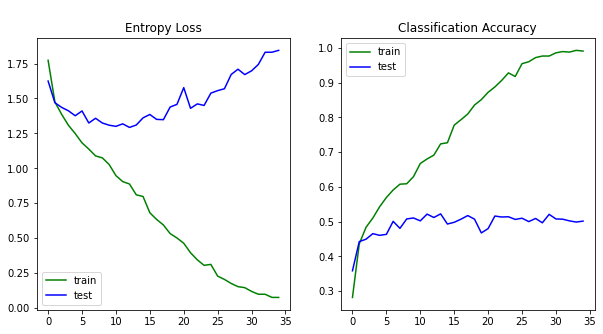

In [35]:
# Build graphs
summarize_diagnostics(history)

In [36]:
# Define CNN model with three VGG-style blocks
def baseline_model_3():
    #reset_random_seeds()
    model = Sequential()
# 1st block    
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 2d block    
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
# 3d block
    model.add(Conv2D(128, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape= (img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
# The model will be fit for 20 epochs - to check if the model can learn the problem.
# Define model
model = baseline_model_3()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 39s 722ms/step - loss: 2.0734 - accuracy: 0.2381 - val_loss: 1.6134 - val_accuracy: 0.3701
Epoch 2/35
53/53 [==============================] - 39s 728ms/step - loss: 1.5407 - accuracy: 0.4164 - val_loss: 1.5616 - val_accuracy: 0.4229
Epoch 3/35
53/53 [==============================] - 41s 777ms/step - loss: 1.4403 - accuracy: 0.4737 - val_loss: 1.4520 - val_accuracy: 0.4451
Epoch 4/35
53/53 [==============================] - 38s 719ms/step - loss: 1.3168 - accuracy: 0.5184 - val_loss: 1.4693 - val_accuracy: 0.4597
Epoch 5/35
53/53 [==============================] - 38s 716ms/step - loss: 1.2878 - accuracy: 0.5315 - val_loss: 1.4468 - val_accuracy: 0.4437
Epoch 6/35
53/53 [==============================] - 38s 718ms/step - loss: 1.2390 - accuracy: 0.5261 - val_loss: 1.4668 - val_accuracy: 0.4514
Epoch 7/35
53/53 [==============================] - 38s 718ms/step - loss: 1.1975 - accuracy: 0.5589 - val_loss: 1.3403 - val_accuracy: 0.4778

In [38]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 49.4444


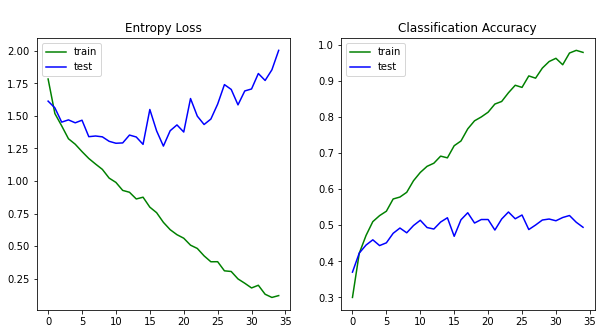

In [39]:
# Build graphs
summarize_diagnostics(history)

In [40]:
class_report(test_set, model)

Confusion Matrix
[[133  28   3   4  29  43]
 [  9 119  26   2   9  75]
 [ 12  38  75  19   9  87]
 [ 37  13  10  90  34  56]
 [ 46  14   8  15 113  44]
 [ 13  14   7   8  16 182]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.53      0.55      0.54       240
       Monet       0.53      0.50      0.51       240
     Pissaro       0.58      0.31      0.41       240
      Renoir       0.65      0.38      0.48       240
     Sargent       0.54      0.47      0.50       240
     VanGogh       0.37      0.76      0.50       240

    accuracy                           0.49      1440
   macro avg       0.53      0.49      0.49      1440
weighted avg       0.53      0.49      0.49      1440



In [83]:
# Part 2 - Add Dropout Regularization and Data Augmentation
# to our Baseline model step by step and evaluate an efficiency  
# ___________________________________________________________


# 1 step - Add Dropout

In [92]:
# Prepare the data. Instanciate ImageDataGenerator that scalse the pixel values to the range of 0-1
# We don't use data augmentation, dropout etc for the Baseline models to check a minimal model performance 
datagen = ImageDataGenerator(rescale=1. / 255, validation_split=0.3)

training_set = datagen.flow_from_directory('artists', 
                                                 subset="training",
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 class_mode='categorical')

test_set = datagen.flow_from_directory('artists', 
                                            subset="validation",
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size, 
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [93]:
# Define CNN model with Dropout Regularization
def model_with_dropout():
    #reset_random_seeds()
    model = Sequential()
   
    model.add(Conv2D(32, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   
   
    model.add(Conv2D(64, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape=(img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
   

    model.add(Conv2D(128, (3, 3), activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', input_shape= (img_rows, img_cols, 3)))
    model.add(MaxPooling2D((2, 2)))
    
   
    model.add(Flatten())
    model.add(Dense(128, activation='relu', 
                    kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax'))
    # Compilation of a model
    opt = SGD(lr=0.001, momentum=0.9) # Gradient descent (with momentum) optimizer.
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [94]:
# The model will be fit for 35 epochs - to check if the model can learn the problem.
# Define model
model = model_with_dropout()
# Fit model
history = model.fit_generator(training_set, steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 42s 778ms/step - loss: 2.1668 - accuracy: 0.1701 - val_loss: 1.7807 - val_accuracy: 0.1625
Epoch 2/35
53/53 [==============================] - 40s 746ms/step - loss: 1.7573 - accuracy: 0.2043 - val_loss: 1.7310 - val_accuracy: 0.2632
Epoch 3/35
53/53 [==============================] - 40s 745ms/step - loss: 1.7313 - accuracy: 0.2604 - val_loss: 1.7200 - val_accuracy: 0.2931
Epoch 4/35
53/53 [==============================] - 40s 752ms/step - loss: 1.7262 - accuracy: 0.2551 - val_loss: 1.7267 - val_accuracy: 0.2590
Epoch 5/35
53/53 [==============================] - 40s 755ms/step - loss: 1.7107 - accuracy: 0.2691 - val_loss: 1.7182 - val_accuracy: 0.2562
Epoch 6/35
53/53 [==============================] - 39s 735ms/step - loss: 1.7182 - accuracy: 0.2500 - val_loss: 1.7139 - val_accuracy: 0.2632
Epoch 7/35
53/53 [==============================] - 39s 736ms/step - loss: 1.6959 - accuracy: 0.2756 - val_loss: 1.6733 - val_accuracy: 0.3208

In [95]:
# Evaluate model
_, acc = model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 50.9722


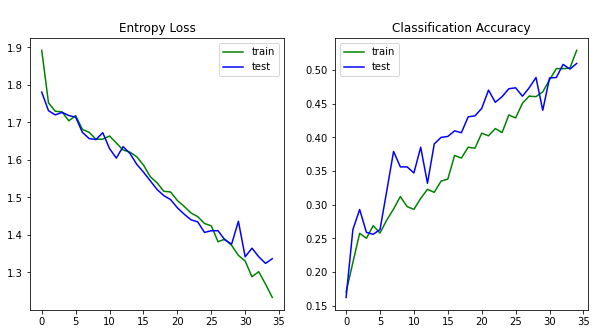

In [96]:
# Build graphs
summarize_diagnostics(history)

In [97]:
class_report(test_set, model)

Confusion Matrix
[[50 34 65 36 27 28]
 [63 40 63 33 20 21]
 [48 46 62 40 22 22]
 [58 36 68 26 23 29]
 [38 56 69 31 22 24]
 [54 48 51 34 24 29]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.16      0.21      0.18       240
       Monet       0.15      0.17      0.16       240
     Pissaro       0.16      0.26      0.20       240
      Renoir       0.13      0.11      0.12       240
     Sargent       0.16      0.09      0.12       240
     VanGogh       0.19      0.12      0.15       240

    accuracy                           0.16      1440
   macro avg       0.16      0.16      0.15      1440
weighted avg       0.16      0.16      0.15      1440



In [31]:
# 2 step - Add Data augmentation
# Use our model with dropout

In [98]:
# Create data generators 
# Train generator with data augmentation
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.3)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  validation_split=0.3)

In [99]:
# Create sets
training_set = train_datagen.flow_from_directory('artists', 
                                                 subset="training",
                                                 target_size=(img_rows, img_cols),
                                                 batch_size=batch_size,
                                                 shuffle = True,
# - link to discussion why both shuffles should be True - in the end of page- https://github.com/keras-team/keras/issues/5862
                                                 seed=42, # seed makes sure that the data is randomized in the same order, same seed for both flows
                                                 class_mode='categorical')


test_set = test_datagen.flow_from_directory('artists', 
                                            subset="validation",
                                            target_size=(img_rows, img_cols),
                                            batch_size=batch_size,
                                            shuffle = True,
                                            seed=42, #  seed makes sure that the data is randomized in the same order
                                            class_mode='categorical')

Found 3360 images belonging to 6 classes.
Found 1440 images belonging to 6 classes.


In [100]:
# Define model
model1 = model_with_dropout()
# Fit model
history = model1.fit_generator(training_set, 
                              steps_per_epoch=len(training_set),
                              validation_data=test_set, 
                              validation_steps=len(test_set), 
                              epochs= epochs)

Epoch 1/35
53/53 [==============================] - 41s 771ms/step - loss: 1.9275 - accuracy: 0.1857 - val_loss: 1.7682 - val_accuracy: 0.2139
Epoch 2/35
53/53 [==============================] - 41s 776ms/step - loss: 1.7737 - accuracy: 0.2169 - val_loss: 1.7466 - val_accuracy: 0.2889
Epoch 3/35
53/53 [==============================] - 43s 809ms/step - loss: 1.7538 - accuracy: 0.2316 - val_loss: 1.7036 - val_accuracy: 0.3201
Epoch 4/35
53/53 [==============================] - 41s 775ms/step - loss: 1.7346 - accuracy: 0.2416 - val_loss: 1.6544 - val_accuracy: 0.3965
Epoch 5/35
53/53 [==============================] - 42s 782ms/step - loss: 1.6993 - accuracy: 0.2707 - val_loss: 1.6114 - val_accuracy: 0.3868
Epoch 6/35
53/53 [==============================] - 41s 777ms/step - loss: 1.6784 - accuracy: 0.2798 - val_loss: 1.6008 - val_accuracy: 0.3958
Epoch 7/35
53/53 [==============================] - 41s 769ms/step - loss: 1.6663 - accuracy: 0.2926 - val_loss: 1.5936 - val_accuracy: 0.3708

In [101]:
# Evaluate model
_, acc = model1.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print("Accuracy: %.4f" % (acc * 100.0))

Accuracy: 46.7361


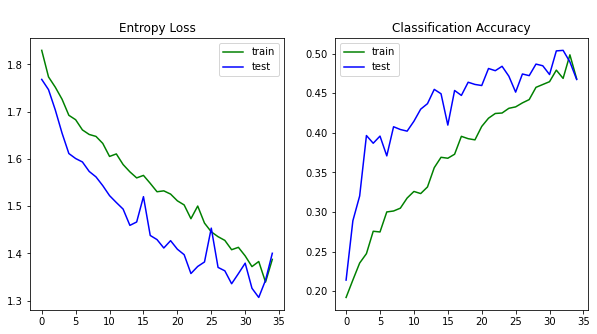

In [102]:
# Build graphs
summarize_diagnostics(history)

In [105]:
class_report(test_set, model1)

Confusion Matrix
[[ 27  50  34  12  21  96]
 [ 31  49  34  15  13  98]
 [ 29  36  46  16  17  96]
 [ 28  40  37  17  11 107]
 [ 27  57  32  12  19  93]
 [ 29  48  41  12  20  90]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.16      0.11      0.13       240
       Monet       0.17      0.20      0.19       240
     Pissaro       0.21      0.19      0.20       240
      Renoir       0.20      0.07      0.10       240
     Sargent       0.19      0.08      0.11       240
     VanGogh       0.16      0.38      0.22       240

    accuracy                           0.17      1440
   macro avg       0.18      0.17      0.16      1440
weighted avg       0.18      0.17      0.16      1440



In [106]:
#Confution Matrix and Classification Report
Y_pred = model1.predict(test_set, 60)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_set.classes, y_pred))
print('Classification Report')
target_names = list(training_set.class_indices.keys())
print(classification_report(test_set.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 26  44  38  12  16 104]
 [ 22  45  32  15  21 105]
 [ 26  44  44  15  21  90]
 [ 32  60  37  15  11  85]
 [ 33  43  42  13  14  95]
 [ 32  44  31  14  18 101]]
Classification Report
              precision    recall  f1-score   support

     Matisse       0.15      0.11      0.13       240
       Monet       0.16      0.19      0.17       240
     Pissaro       0.20      0.18      0.19       240
      Renoir       0.18      0.06      0.09       240
     Sargent       0.14      0.06      0.08       240
     VanGogh       0.17      0.42      0.25       240

    accuracy                           0.17      1440
   macro avg       0.17      0.17      0.15      1440
weighted avg       0.17      0.17      0.15      1440



In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (5, 5), input_shape=(img_rows, img_cols, 3), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (5, 5), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (5, 5), padding='valid'))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Flatten())
# model.add(Dense(64))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(11))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['accuracy'])

# #Train
# model.fit(training_set,
#                     steps_per_epoch=num_of_train_samples // batch_size,
#                     epochs=epochs,
#                     validation_data=test_set,
#                     validation_steps=num_of_test_samples // batch_size)